#Loan Approval Prediction: Using Linear Regression and Random Forests
Simran Judge, Gabriel Romero


In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


**Attribute Information**:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 

X2: Gender (1 = male; 2 = female). 

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

X4: Marital status (1 = married; 2 = single; 3 = others). 

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

In [0]:
import pandas as pd 
#df=pd.read_csv('drive/Team Drives/COEN 281 - Pattern Recognition and Data Mining/defaultCreditCardPayment.csv')

df = pd.read_csv('defaultCreditCardPayment.csv')
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_NEXT_MONTH
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [0]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEFAULT_NEXT_MONTH'],
      dtype='object')

We will verify that there are no missing values in our data set. If there are, we will perform the appropriate steps to either transform or eliminate those data points.

In [0]:
#Check for missing data values
tot_null = df.isnull().sum().sort_values(ascending=False)
percent_null = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
pd.concat([tot_null, percent_null], axis=1, keys=['Total Null', 'Percent Null']).transpose()

,DEFAULT_NEXT_MONTH,PAY_AMT6,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,LIMIT_BAL
Total Null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent Null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There are no missing values in our dataset. 

# Exploratory Data Analysis

We will explore the data first by creating a correlation matrix.

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


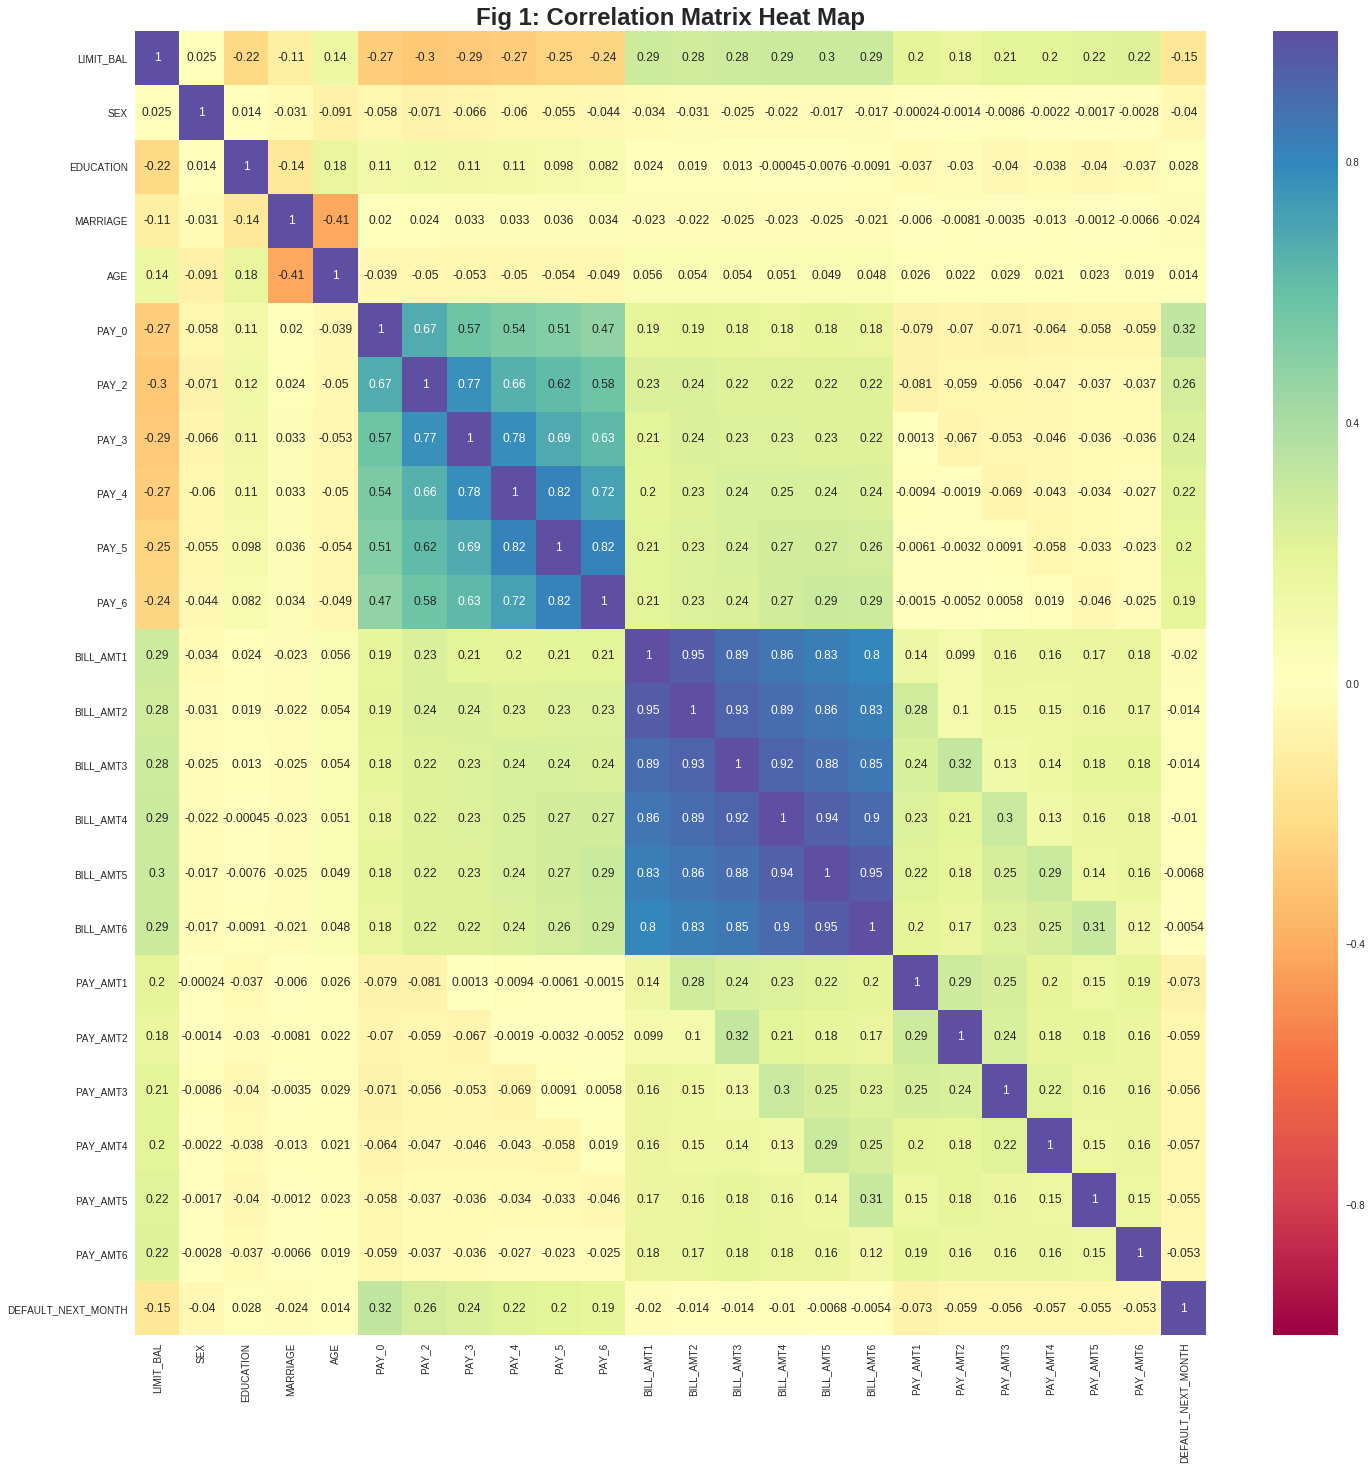

In [0]:
correlation_matrix = df.corr()
plt.figure(figsize=(24,24))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral')
plt.title('Fig 1: Correlation Matrix Heat Map', fontweight='bold', size = 24)
plt.show()

In [0]:
#Default Accounts vs Non-Default Accounts


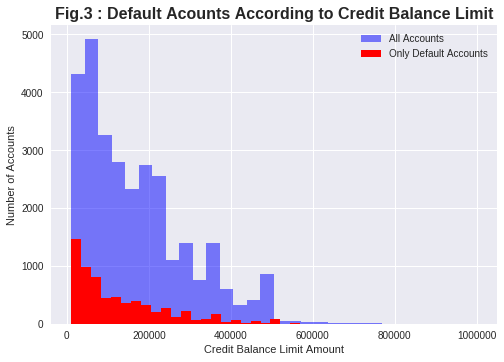

In [0]:
#Credit Limit Balance
plt.hist(df.LIMIT_BAL, bins = 30, color = 'b', label = 'All Accounts', alpha=0.5)
plt.hist(df.LIMIT_BAL[df['DEFAULT_NEXT_MONTH']==1], bins = 30, color='r', label='Only Default Accounts')

plt.xlabel('Credit Balance Limit Amount');plt.ylabel('Number of Accounts')
plt.title('Fig.3 : Default Acounts According to Credit Balance Limit', fontweight="bold", size = 16)
plt.legend()
plt.show()

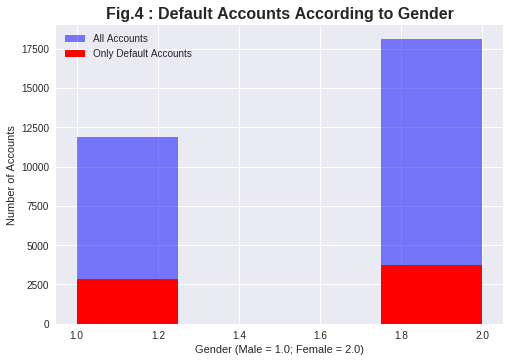

In [0]:
#Sex
plt.hist(df.SEX, bins = 4, color = 'b', label = 'All Accounts', alpha=0.5)
plt.hist(df.SEX[df['DEFAULT_NEXT_MONTH']==1], bins = 4, color='r', label='Only Default Accounts')

plt.xlabel('Gender (Male = 1.0; Female = 2.0)');plt.ylabel('Number of Accounts')
plt.title('Fig.4 : Default Accounts According to Gender', fontweight="bold", size = 16)
plt.legend()
plt.show()

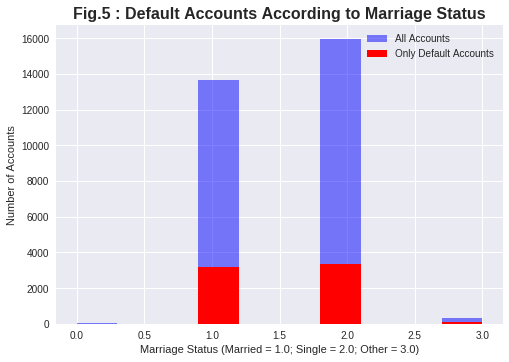

In [0]:
#Marriage Status
plt.hist(df.MARRIAGE, bins = 10, color = 'b', label = 'All Accounts', alpha=0.5)
plt.hist(df.MARRIAGE[df['DEFAULT_NEXT_MONTH']==1], bins = 10, color='r', label='Only Default Accounts')

plt.xlabel('Marriage Status (Married = 1.0; Single = 2.0; Other = 3.0)');plt.ylabel('Number of Accounts')
plt.title('Fig.5 : Default Accounts According to Marriage Status', fontweight="bold", size = 16)
plt.legend()
plt.show()

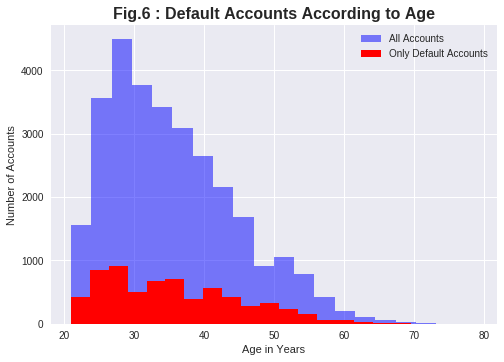

In [0]:
#Age
plt.hist(df.AGE, bins = 20, color = 'b', label = 'All Accounts', alpha=0.5)
plt.hist(df.AGE[df['DEFAULT_NEXT_MONTH']==1], bins = 20, color='r', label='Only Default Accounts')

plt.xlabel('Age in Years');plt.ylabel('Number of Accounts')
plt.title('Fig.6 : Default Accounts According to Age', fontweight="bold", size = 16)
plt.legend()
plt.show()

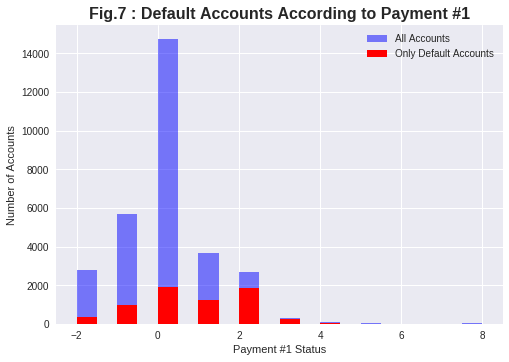

In [0]:
#according to first payment
plt.hist(df.PAY_0, bins = 20, color = 'b', label = 'All Accounts', alpha=0.5)
plt.hist(df.PAY_0[df['DEFAULT_NEXT_MONTH']==1], bins = 20, color='r', label='Only Default Accounts')

plt.xlabel('Payment #1 Status');plt.ylabel('Number of Accounts')
plt.title('Fig.7 : Default Accounts According to Payment #1', fontweight="bold", size = 16)
plt.legend()
plt.show()

#Decision Trees + Random Forests

In [0]:
#Needed for the tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold

#Needed for the forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [0]:
df['DEFAULT_NEXT_MONTH'].value_counts()

0    23364
1     6636
Name: DEFAULT_NEXT_MONTH, dtype: int64

If our model were to predict all 0's, it would have a 77.88% of accuracy. We can use this percentage as our baseline model and try to improve from there.

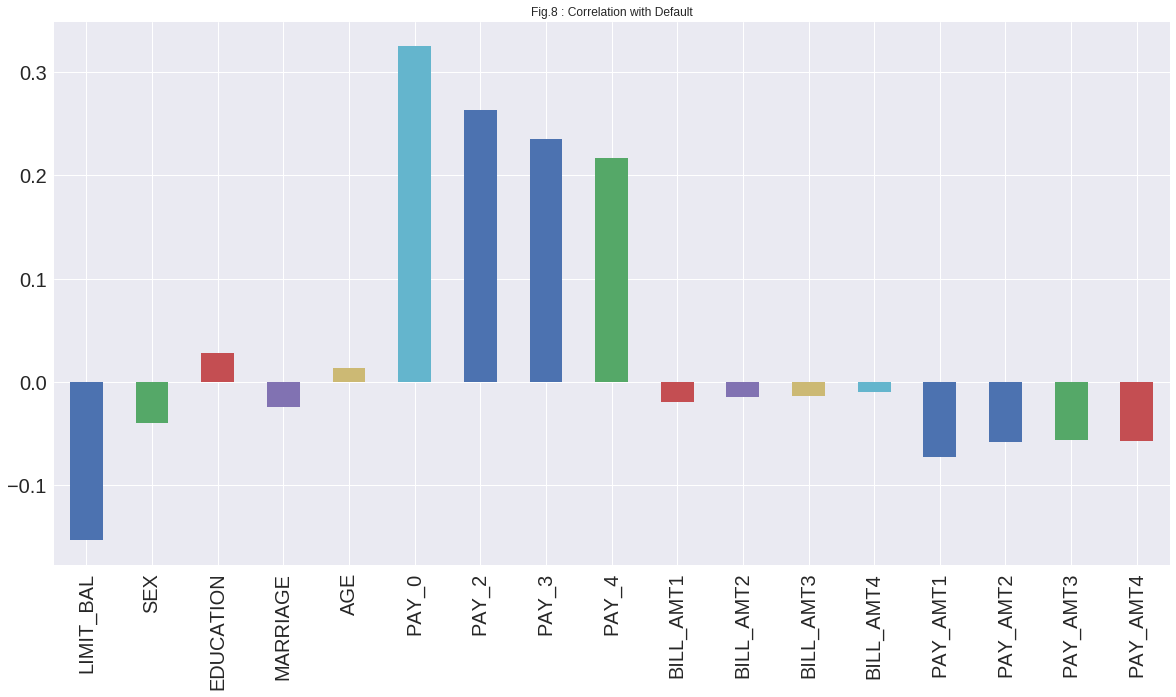

In [0]:
X = df.drop(['DEFAULT_NEXT_MONTH'],axis=1)
y = df['DEFAULT_NEXT_MONTH']


X.corrwith(df['DEFAULT_NEXT_MONTH']).plot.bar(
        figsize = (20, 10), title = "Fig.8 : Correlation with Default", fontsize = 20,
        rot = 90, grid = True)
plt.show()

In [0]:
# In order to speed up training we will drop some attributes
#del df['ID']
del df['BILL_AMT5']
del df['BILL_AMT6']
del df['PAY_AMT5']
del df['PAY_AMT6']
del df['PAY_5']
del df['PAY_6']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
LIMIT_BAL             30000 non-null int64
SEX                   30000 non-null int64
EDUCATION             30000 non-null int64
MARRIAGE              30000 non-null int64
AGE                   30000 non-null int64
PAY_0                 30000 non-null int64
PAY_2                 30000 non-null int64
PAY_3                 30000 non-null int64
PAY_4                 30000 non-null int64
BILL_AMT1             30000 non-null int64
BILL_AMT2             30000 non-null int64
BILL_AMT3             30000 non-null int64
BILL_AMT4             30000 non-null int64
PAY_AMT1              30000 non-null int64
PAY_AMT2              30000 non-null int64
PAY_AMT3              30000 non-null int64
PAY_AMT4              30000 non-null int64
DEFAULT_NEXT_MONTH    30000 non-null int64
dtypes: int64(18)
memory usage: 4.1 MB


We are dropping some of the attributes we believe have the least impact on the prediction based on the correlation with defaulting the payment. We are doing this in order to have less attributes and have a quicker process of training.

In [0]:
y = df['DEFAULT_NEXT_MONTH'].copy()
X = df.copy().drop('DEFAULT_NEXT_MONTH', axis = 1)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=895)


We divide the dataset into train and test

In [0]:
tree = DecisionTreeClassifier()
tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
tree.fit(X_train, y_train)
prediction = tree.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, prediction) * 100,3)))

Accuracy: 72.788%


Without limits on the depth the trees have a really bad accuracy considering that our baseline is ~78

In [0]:
best_tree = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=13, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [0]:
skf = StratifiedKFold(n_splits = 5, shuffle=True, random_state=268)

In [0]:
param_grid = {'max_depth': np.arange(2,10),
              'min_samples_split' : np.arange(2,20,2),
              'min_samples_leaf' : np.arange(1,21,2),
             'random_state': [42]}

#create a grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs=-1, cv=skf)

#training
%time grid_tree.fit(X_train, y_train)

#let's see the best estimator
best_tree = grid_tree.best_estimator_
print(best_tree)
print("_"*40)
#with its score
print("Cross-validated best score {}%".format(round(grid_tree.best_score_ * 100,3)))
#score on test
predictions = best_tree.predict(X_test)
print("Test score: {}%".format(round(accuracy_score(y_true = y_test, y_pred = predictions) * 100,3)))

CPU times: user 19 s, sys: 1.03 s, total: 20.1 s
Wall time: 4min 28s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=13, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
________________________________________
Cross-validated best score 82.075%
Test score: 81.99%


In [0]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)

plot_confusion_matrix(cm, classes=[0,1])
sns.set(rc={'figure.figsize':(6,6)})
plt.show()